In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [14]:
short_df = pd.read_csv("short_df.csv")

In [63]:
resps = short_df[["resp_1", "resp_2", "resp_3", "resp", "resp_4"]]

### Boxplot without outliers
* can be used to see the range of each time horizon, identify volatility
* rank time horizon from longest to shortest based on volatility
    * resp_4, resp, resp_3, resp_2, resp_1

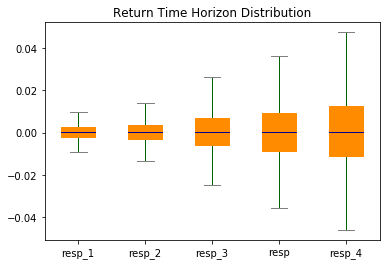

In [88]:
# boxplot without outliers
props = dict(boxes="DarkOrange", whiskers="DarkGreen", medians="DarkBlue", caps="Gray")
resps.plot.box(showfliers = False, title = "Return Time Horizon Distribution", color=props, patch_artist=True)

In [68]:
# mean of return
resp_1_mu = np.mean(resps["resp_1"])
resp_2_mu = np.mean(resps["resp_2"])
resp_3_mu = np.mean(resps["resp_3"])
resp_mu = np.mean(resps["resp"])
resp_4_mu = np.mean(resps["resp_4"])
[resp_1_mu, resp_2_mu, resp_3_mu,resp_mu,resp_4_mu]

[0.00033884724959467916,
 0.0004127036253052784,
 0.0006412812641291029,
 0.0008422956351295517,
 0.0010035224102693347]

In [69]:
# standard deviation of return
[np.std(resps["resp_1"]), np.std(resps["resp_2"]), np.std(resps["resp_3"]), np.std(resps["resp"]), np.std(resps["resp_4"])]








[0.009791262007181107,
 0.013603640321681204,
 0.02104170606849014,
 0.029945465504688955,
 0.03639054165969399]

### Remove Outliers

In [29]:
z_scores = stats.zscore(resps)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_resps = resps[filtered_entries]

### Compare distribution w/ Density Plots

In [ ]:
all_resps = ["resp_1", "resp_2", "resp_3", "resp_4", "resp"]
for i in range(5):
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)

### Q-Q plot to compare distribution

In [ ]:
# compare ones with biggest contrast in volatility: resp_1 & resp_4
# compare ones that are closer: resp_1 & resp_2, resp_3 & resp
# https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/

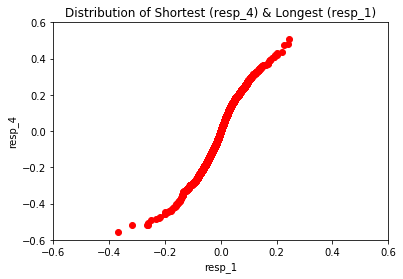

In [100]:
# two most extreme
# compare longest (resp_1) & shortest (resp_4) time horizon in terms of returns
# resp_4: shorter time horizon
# resp_1: longer time horizon
plt.figure()
plt.scatter(np.sort(resps["resp_1"]), np.sort(resps["resp_4"]), color = "red")
plt.title("Distribution of Shortest (resp_4) & Longest (resp_1)")
plt.xlabel('resp_1')
plt.ylabel('resp_4')
plt.xlim(-.6, .6)
plt.ylim(-.6, .6)
plt.show()
plt.close()
# negative return: concave: resp_4 has lower value than resp_1 --> shorter time horizon loses more money
# positive return: convex: resp_4 has higher value than resp_1 --> shorter time horizon gains more money
# that's some LIT finding, matches with investment intuititon

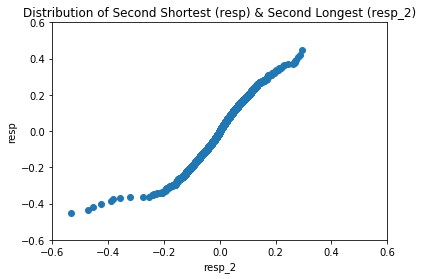

In [75]:
# 2nd most extremes
plt.figure()
plt.scatter(np.sort(resps["resp_2"]), np.sort(resps["resp"]))
plt.xlabel('resp_2')
plt.ylabel('resp')
plt.title("Distribution of Second Shortest (resp) & Second Longest (resp_2)")
plt.xlim(-.6, .6)
plt.ylim(-.6, .6)
plt.show()
plt.close()

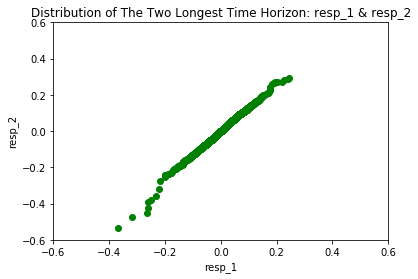

In [97]:
# compare two longest
plt.figure()
plt.scatter(np.sort(resps["resp_1"]), np.sort(resps["resp_2"]), color = "green")
plt.xlabel('resp_1')
plt.ylabel('resp_2')
plt.title("Distribution of The Two Longest Time Horizon: resp_1 & resp_2")
plt.xlim(-.6, .6)
plt.ylim(-.6, .6)
plt.show()
plt.close()

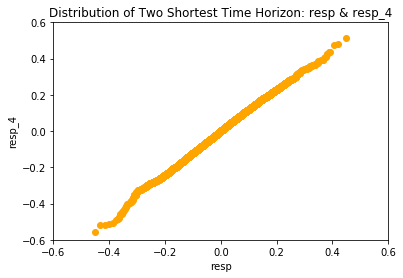

In [101]:
# compare two shortest
plt.figure()
plt.scatter(np.sort(resps["resp"]), np.sort(resps["resp_4"]), color = "orange")
plt.xlabel('resp')
plt.ylabel('resp_4')
plt.title("Distribution of Two Shortest Time Horizon: resp & resp_4")
plt.xlim(-.6, .6)
plt.ylim(-.6, .6)
plt.show()
plt.close()

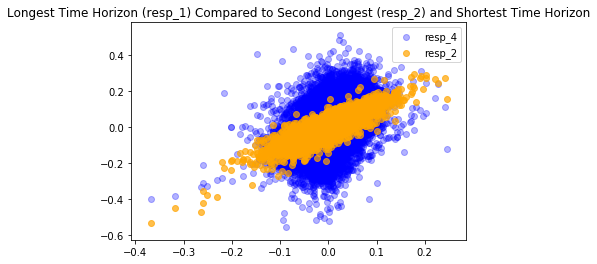

In [94]:
# longest compared to second longest & shortest: resp_1 compared to resp_2 & resp_4
plt.scatter(resps["resp_1"],resps["resp_4"],color='blue', label = "resp_4", alpha = 0.3)
plt.scatter(resps["resp_1"],resps["resp_2"],color='orange', label = "resp_2", alpha = 0.7)
plt.title("Longest Time Horizon (resp_1) Compared to Second Longest (resp_2) and Shortest Time Horizon")
plt.legend()
plt.show()